In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [5]:
# Set up directories for training and testing
train_dir = r'K:/PROJECT/ORGANISED DATASET/train'  
test_dir = r'K:/PROJECT/ORGANISED DATASET/test'

# Set image size and batch size
IMG_HEIGHT = 224  # VGG16 input size
IMG_WIDTH = 224   # VGG16 input size
BATCH_SIZE = 32

In [6]:
# Image Preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the image
    rotation_range=30,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'  # Filling missing pixels after transformations
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for the test set

In [7]:
# Load train and test generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification (benign vs malignant)
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification (benign vs malignant)
    shuffle=False  # Don't shuffle for evaluation
)

Found 6185 images belonging to 2 classes.
Found 1723 images belonging to 2 classes.


In [8]:
# Build the VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the base model layers (so they are not trained)
base_model.trainable = False

# Create the full model by adding custom layers
model = Sequential([
    base_model,  # Add the pre-trained VGG16 base
    Flatten(),  # Flatten the output of the convolutional layers
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

58889256/58889256 [==============================] - 6s 0us/step


In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Set up EarlyStopping to stop training early if validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [13]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping]  # Use early stopping to prevent overfitting
)

Epoch 1/10
194/194 [==============================] - 1717s 9s/step - loss: 0.4822 - accuracy: 0.7449 - val_loss: 0.3995 - val_accuracy: 0.8091
Epoch 2/10
194/194 [==============================] - 1716s 9s/step - loss: 0.4745 - accuracy: 0.7504 - val_loss: 0.4003 - val_accuracy: 0.8149
Epoch 3/10
194/194 [==============================] - 1721s 9s/step - loss: 0.4812 - accuracy: 0.7538 - val_loss: 0.3729 - val_accuracy: 0.8352
Epoch 4/10
194/194 [==============================] - 1721s 9s/step - loss: 0.4683 - accuracy: 0.7586 - val_loss: 0.3785 - val_accuracy: 0.8311
Epoch 5/10
194/194 [==============================] - 1721s 9s/step - loss: 0.4645 - accuracy: 0.7541 - val_loss: 0.3957 - val_accuracy: 0.7858
Epoch 6/10
194/194 [==============================] - 1732s 9s/step - loss: 0.4570 - accuracy: 0.7551 - val_loss: 0.3601 - val_accuracy: 0.8433
Epoch 7/10
194/194 [==============================] - 1722s 9s/step - loss: 0.4436 - accuracy: 0.7610 - val_loss: 0.3438 - val_accuracy:

In [14]:
# Save the trained model
model.save("C:/Users/K M SASTRY/Desktop/PROJECT/vgg16_model.h5")

C:\Users\K M SASTRY\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


54/54 [==============================] - 371s 7s/step - loss: 0.3829 - accuracy: 0.7824
Test accuracy: 78.24%


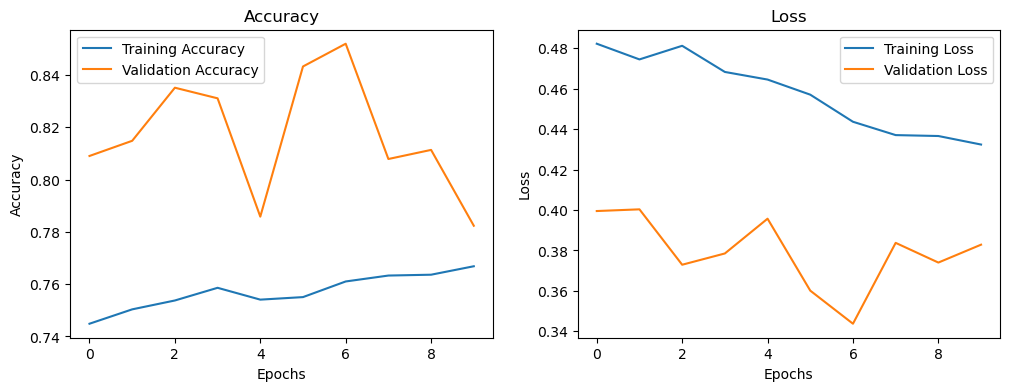

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")# Plot the training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Example image path
img_path = r"K:\PROJECT\ORGANISED DATASET\test\BENIGN\fibroadenoma\SOB_B_F_14-21998EF\100X\SOB_B_F-14-21998EF-100-009.png"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Ensure target size matches your model input
img_array = image.img_to_array(img)  # Convert the image to an array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(img_array)
if prediction < 0.5:
    print("Predicted class: Benign")
else:
    print("Predicted class: Malignant")

1/1 [==============================] - 0s 295ms/step
Predicted class: Benign


In [18]:
# To make predictions on a new image
from tensorflow.keras.preprocessing import image
import numpy as np

# Example image path (replace with the path of an image you want to test)
img_path = r"K:\PROJECT\ORGANISED DATASET\test\MALIGNANT\mucinous_carcinoma\SOB_M_MC_14-13413\200X\SOB_M_MC-14-13413-200-005.png"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)  # Convert the image to an array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(img_array)
if prediction < 0.5:
    print("Predicted class: Benign")
else:
    print("Predicted class: Malignant")


1/1 [==============================] - 0s 285ms/step
Predicted class: Malignant


In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Example image path
img_path = r"K:\PROJECT\ORGANISED DATASET\test\BENIGN\adenosis\SOB_B_A_14-22549AB\40X\SOB_B_A-14-22549AB-40-001.png"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Ensure target size matches your model input
img_array = image.img_to_array(img)  # Convert the image to an array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(img_array)
if prediction < 0.5:
    print("Predicted class: Benign")
else:
    print("Predicted class: Malignant")

1/1 [==============================] - 0s 287ms/step
Predicted class: Benign


In [23]:
# To make predictions on a new image
from tensorflow.keras.preprocessing import image
import numpy as np

# Example image path (replace with the path of an image you want to test)
img_path = r"K:\PROJECT\ORGANISED DATASET\test\MALIGNANT\ductal_carcinoma\SOB_M_DC_14-4364\100X\SOB_M_DC-14-4364-100-002.png"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)  # Convert the image to an array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(img_array)
if prediction < 0.5:
    print("Predicted class: Benign")
else:
    print("Predicted class: Malignant")


1/1 [==============================] - 0s 287ms/step
Predicted class: Malignant
